<a href="https://colab.research.google.com/github/yashhhp/Customer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/marketing_data.csv')

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [ ]:
df.shape

(2240, 28)

In [ ]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [ ]:
df.columns = df.columns.str.replace(' ', '')

In [ ]:
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '').astype('float')

<ipython-input-9-f0c5024992d8>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Income'] = df['Income'].str.replace('$', '')


In [ ]:
df['Income'].fillna(df['Income'].median())

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64

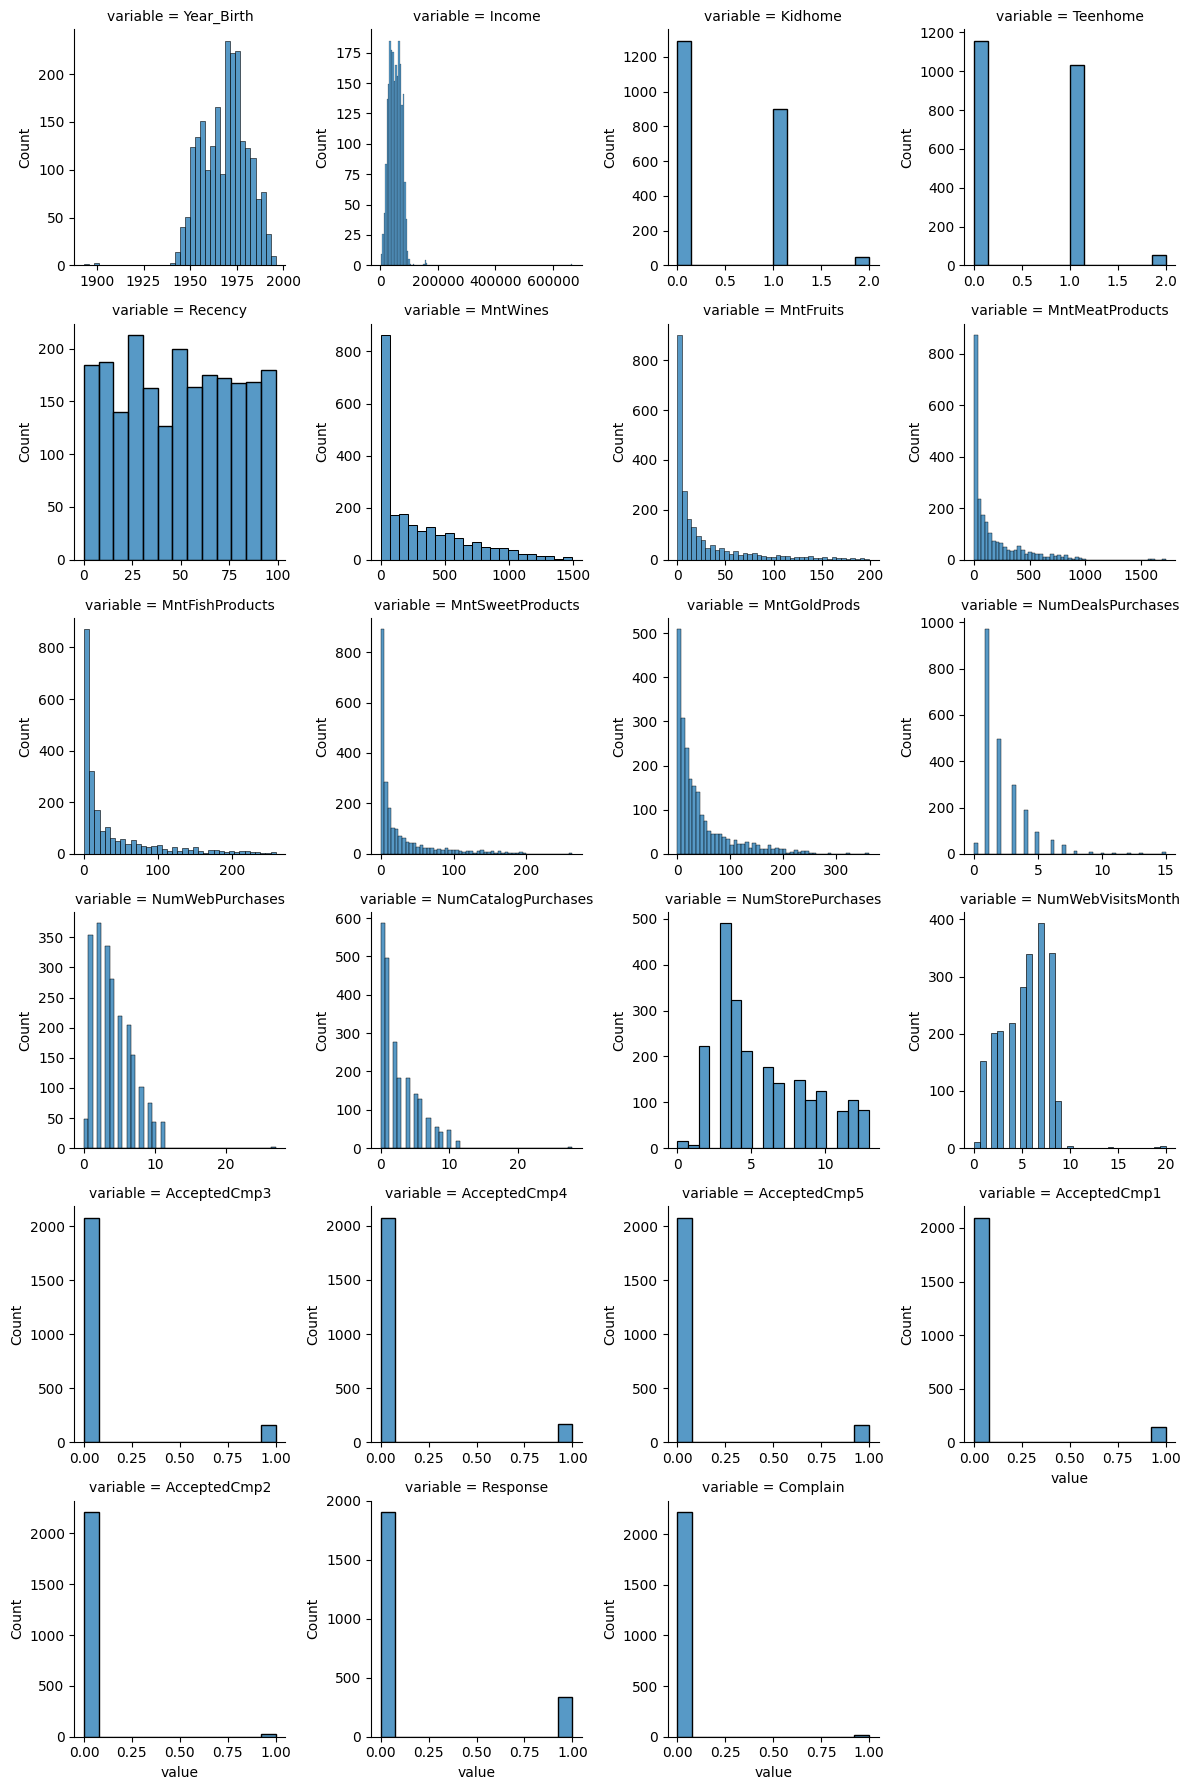

In [ ]:
dist = pd.DataFrame(data = df, columns = ['Year_Birth', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain'])
nd = pd.melt(dist, value_vars = dist)
n1 = sns.FacetGrid(nd, col = "variable", col_wrap = 4, sharex = False, sharey = False)
n1 = n1.map(sns.histplot, "value")
plt.show()

<Axes: >

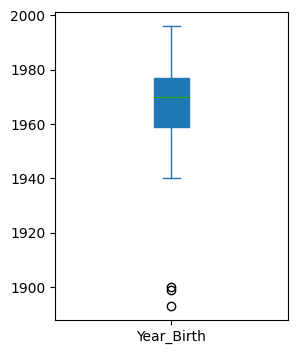

<Axes: >

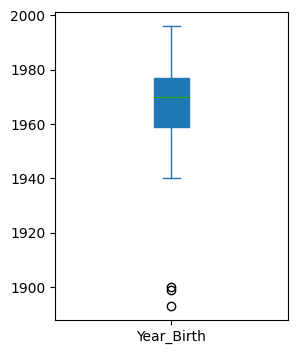

In [ ]:
df['Year_Birth'].plot(kind='box', figsize=(3,4), patch_artist=True)

In [ ]:
df.drop(df[df['Year_Birth'] <= 1900].index, inplace = True)

In [ ]:
len(df['Year_Birth'])

2237

<Axes: >

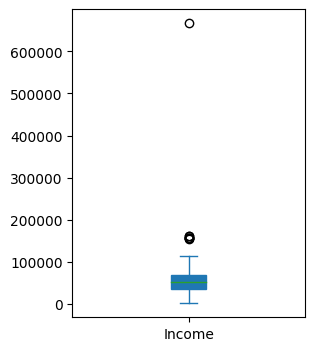

In [ ]:
df['Income'].plot(kind='box', figsize=(3,4), patch_artist=True)

<Axes: xlabel='Income', ylabel='Density'>

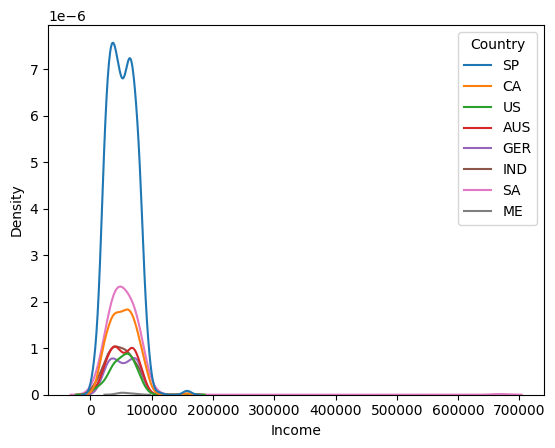

In [ ]:
sns.kdeplot(data=df, x="Income", hue="Country")

In [ ]:
df[df['Income'] > 500000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
527,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,3,6,0,0,0,0,0,0,0,SA


In [ ]:
df[df['Income'] > 600000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
527,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,3,6,0,0,0,0,0,0,0,SA


In [ ]:
df.drop(df[df['Income'] == 666666].index, inplace = True)

<ipython-input-29-901de5b0e9b6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'], kde=True, hist=True)


Text(0, 0.5, 'count')

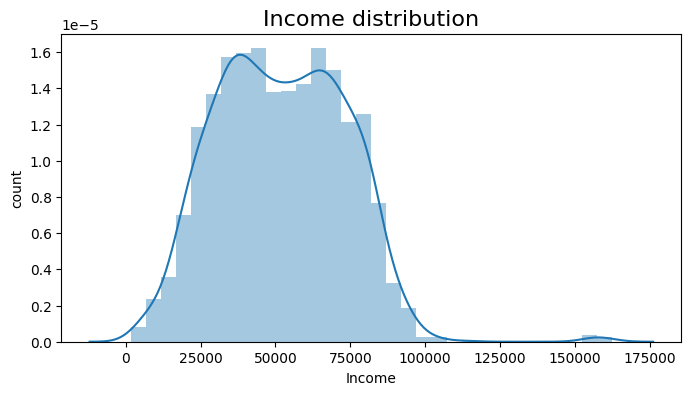

In [ ]:
plt.figure(figsize=(8,4))
sns.distplot(df['Income'], kde=True, hist=True)
plt.title('Income distribution', size=16)
plt.ylabel('count')

<ipython-input-30-27a320f12ac6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


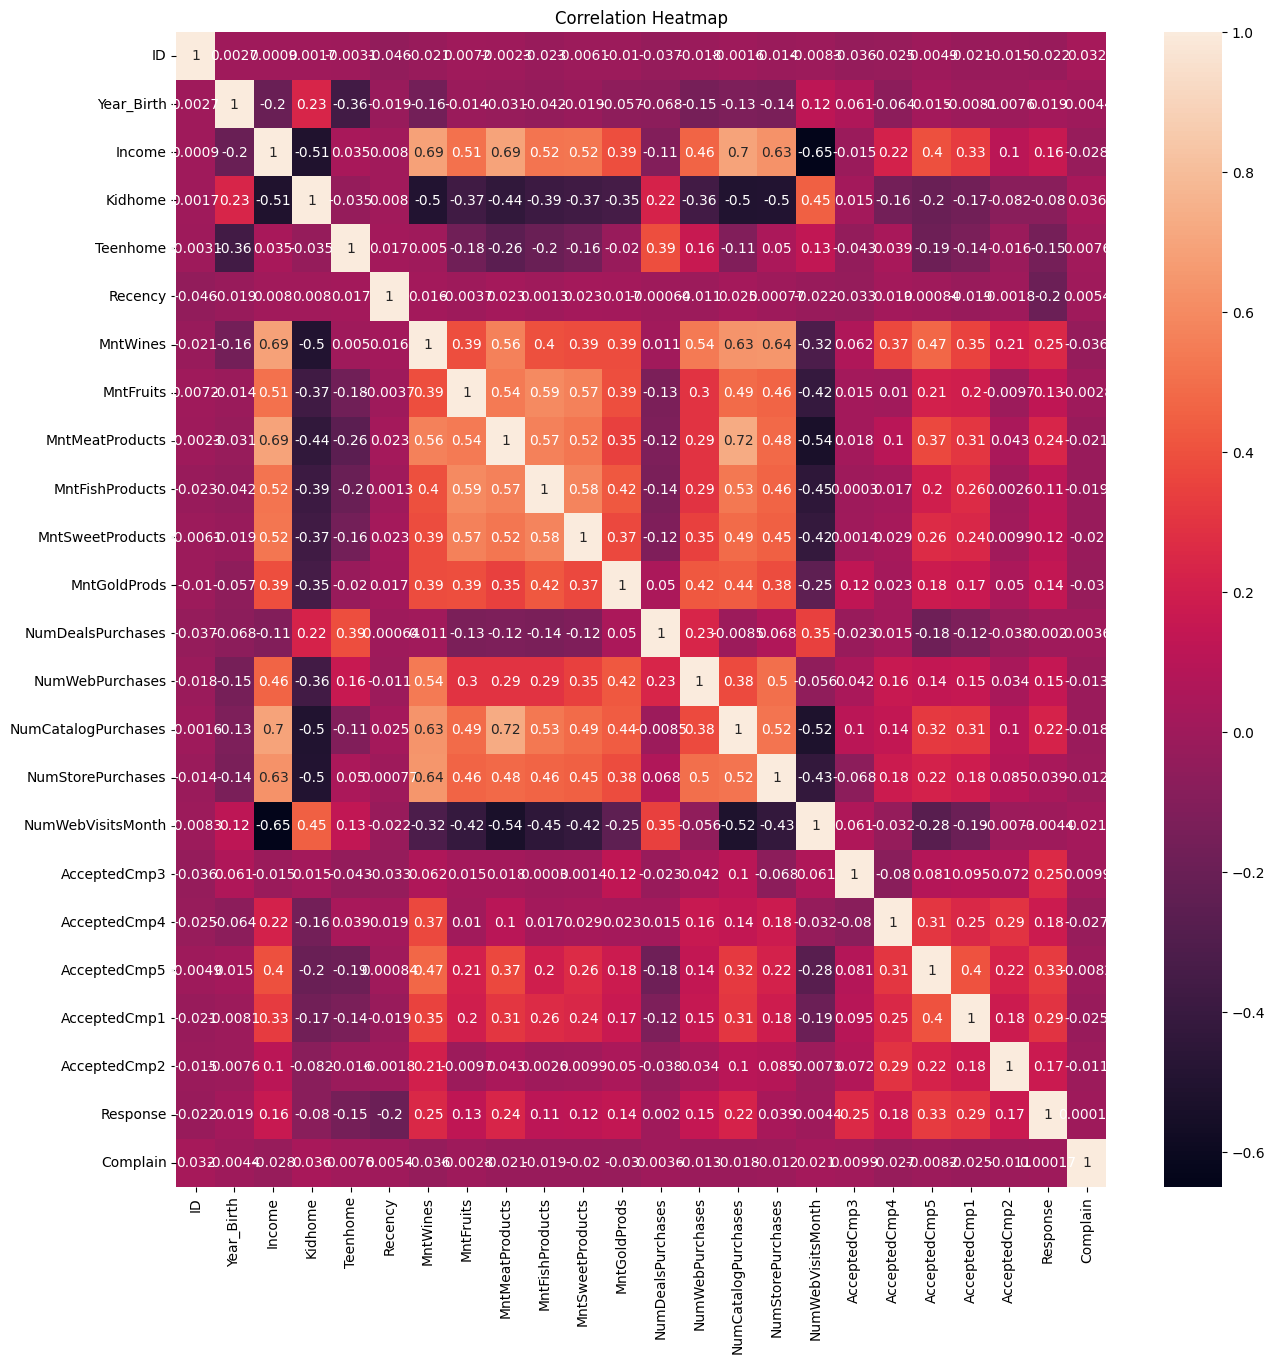

In [ ]:
plt.figure(figsize=(15,15)) #Corellation Heatmap
plt.title(label = "Correlation Heatmap")
sns.heatmap(df.corr(), annot=True)
plt.show()

<ipython-input-32-9712c184283d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MntFishProducts'], kde=False, hist=True, bins=12)


Text(0, 0.5, 'count')

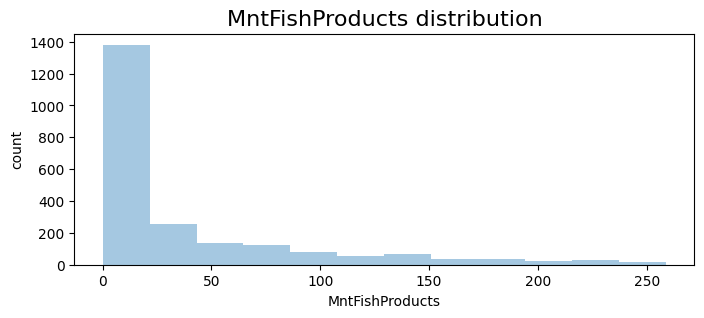

In [ ]:
plt.figure(figsize=(8,3))
sns.distplot(df['MntFishProducts'], kde=False, hist=True, bins=12)
plt.title('MntFishProducts distribution', size=16)
plt.ylabel('count')

<ipython-input-34-c9ed60734f30>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['NumStorePurchases'], kde=False, hist=True, bins=12)


Text(0, 0.5, 'count')

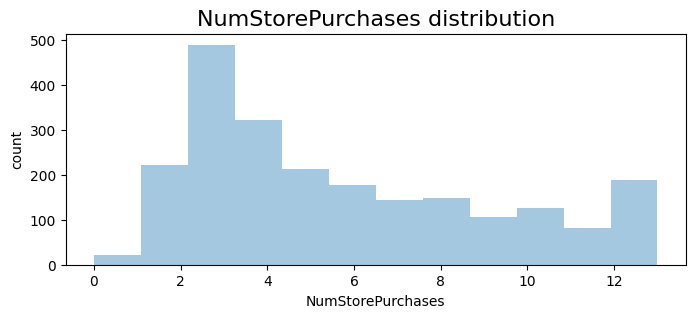

In [ ]:
plt.figure(figsize=(8,3))
sns.distplot(df['NumStorePurchases'], kde=False, hist=True, bins=12)
plt.title('NumStorePurchases distribution', size=16)
plt.ylabel('count')

In [ ]:
df.Education.value_counts()

Graduation    1126
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: Education, dtype: int64

In [ ]:
df["Marital_Status"].value_counts()

Married     864
Together    578
Single      479
Divorced    231
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [ ]:
df.drop(df[df['Marital_Status'] == "YOLO"].index, inplace = True)
df.drop(df[df['Marital_Status'] == "Absurd"].index, inplace = True)
df.drop(df[df['Marital_Status'] == "Alone"].index, inplace = True)

In [ ]:
import plotly.express as px
fig = px.pie(df, labels='Marital_Status')
fig.show()

In [ ]:
df["Dt_Customer"][df["Response"] == 1].dt.weekday.value_counts()

0    58
2    55
4    51
1    50
5    46
3    41
6    30
Name: Dt_Customer, dtype: int64

<Axes: xlabel='Education', ylabel='Income'>

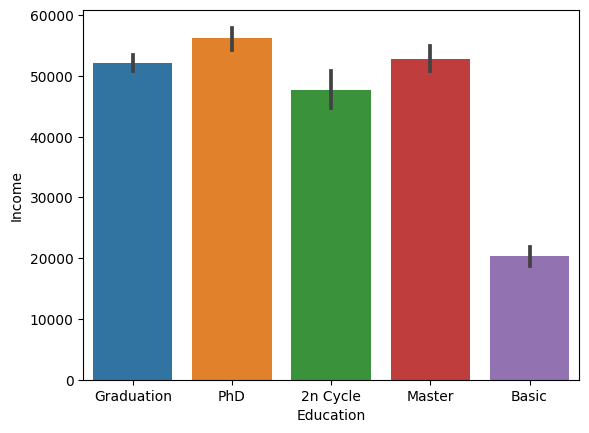

In [ ]:
sns.barplot(x=df["Education"],y=df["Income"])

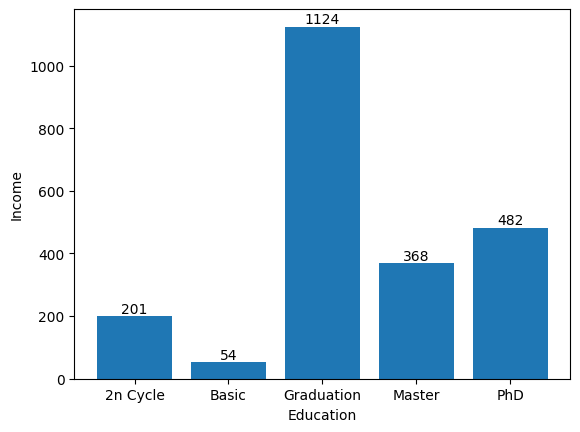

In [ ]:
plot = plt.bar(df.groupby(by = "Education").count()["ID"].index.to_list(),
                df.groupby(by = "Education").count()["ID"].to_list())

for value in plot:  #Add the data value on head of the bar
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom')

plt.xlabel("Education")
plt.ylabel("Income")

plt.show()

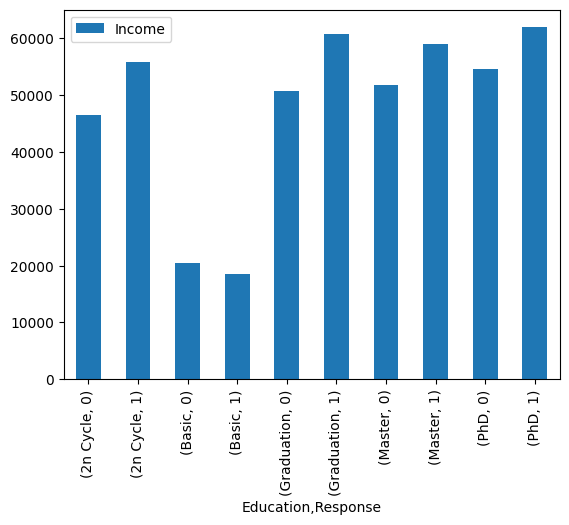

In [ ]:
df.pivot_table(["Income"], ["Education","Response"], aggfunc="mean").plot.bar()
plt.show()

In [ ]:
df["Country"].value_counts()

SP     1094
SA      335
CA      263
AUS     159
IND     146
GER     120
US      109
ME        3
Name: Country, dtype: int64

<Axes: >

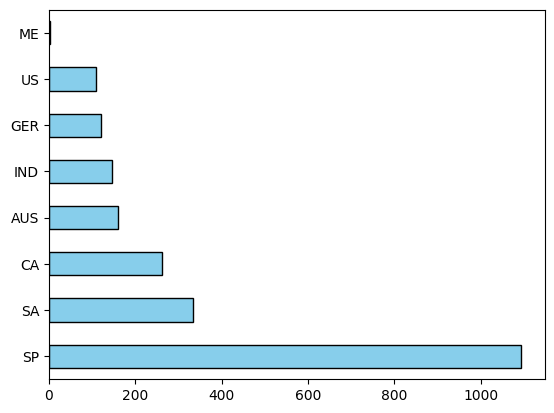

In [ ]:
df['Country'].value_counts().plot(kind='barh', color='skyblue', edgecolor=(0,0,0))

In [ ]:
df["Marital_Status"][df["Response"] == 1].value_counts()

Single      106
Married      98
Together     60
Divorced     48
Widow        19
Name: Marital_Status, dtype: int64

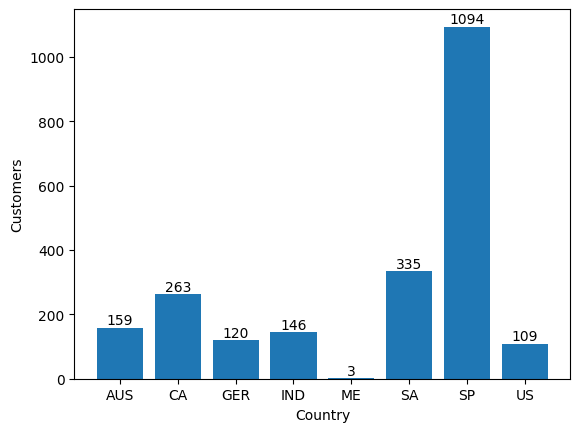

In [ ]:
plot = plt.bar(df.groupby(by = "Country").count()["ID"].index.to_list(),
               df.groupby(by = "Country").count()["ID"].to_list())

for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom')

plt.xlabel("Country")
plt.ylabel("Customers")

plt.rcParams["figure.figsize"] = (10,6)
plt.show()

<Axes: xlabel='Country', ylabel='Count'>

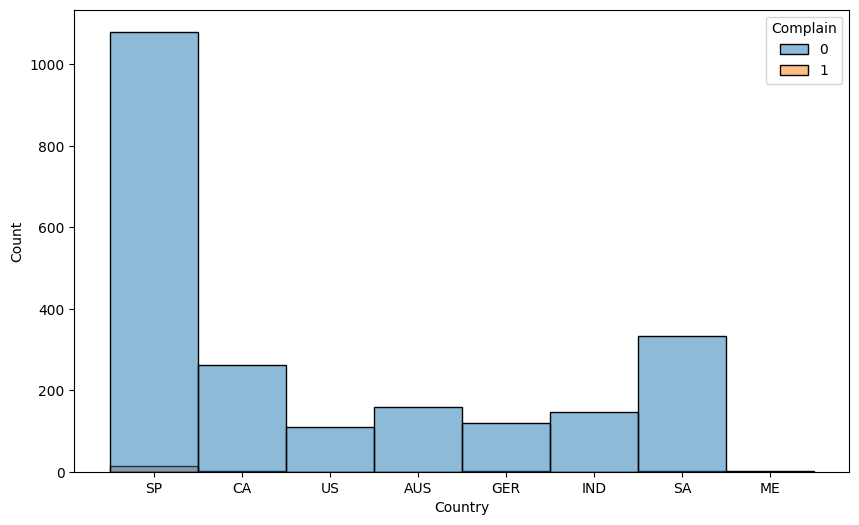

In [ ]:
sns.histplot(data=df, x="Country", hue="Complain")

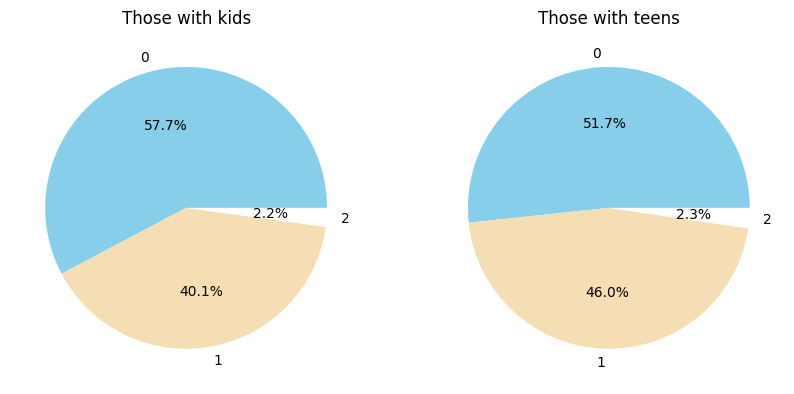

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10)) #ax1,ax2 refer to your two pies

# 1,2 denotes 1 row, 2 columns - if you want to stack vertically, it would be 2,1
colors= 'skyblue', 'wheat', 'white'

labels = df['Kidhome'].unique()
values = df['Kidhome'].value_counts()
ax1.pie(values,labels = labels,colors = colors,autopct = '%1.1f%%') #plot first pie


labels = df['Teenhome'].unique()
values = df['Teenhome'].value_counts()
ax2.pie(values,labels = labels,colors = colors,autopct = '%1.1f%%') #plot second pie

ax1.set(aspect="equal", title='Those with kids')
ax2.set(aspect="equal", title='Those with teens')
plt.show()

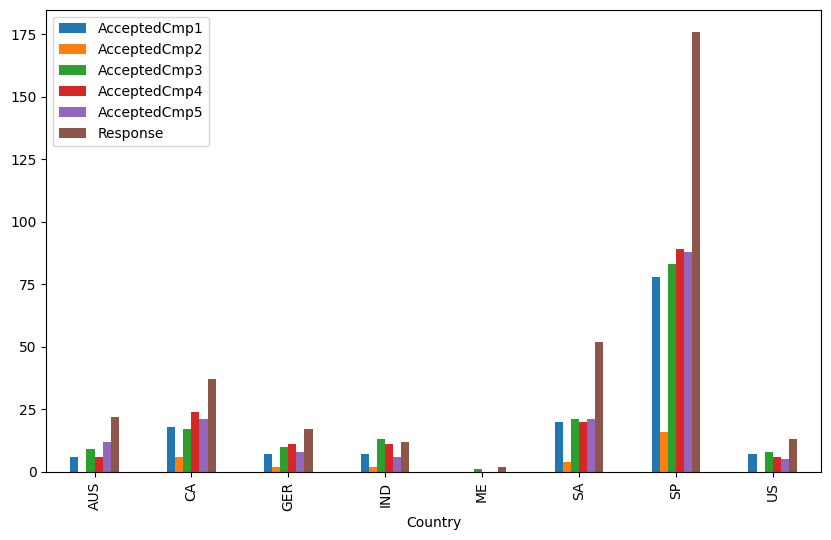

In [ ]:
df.pivot_table(["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"], ["Country"], aggfunc="sum").plot.bar()
plt.show()

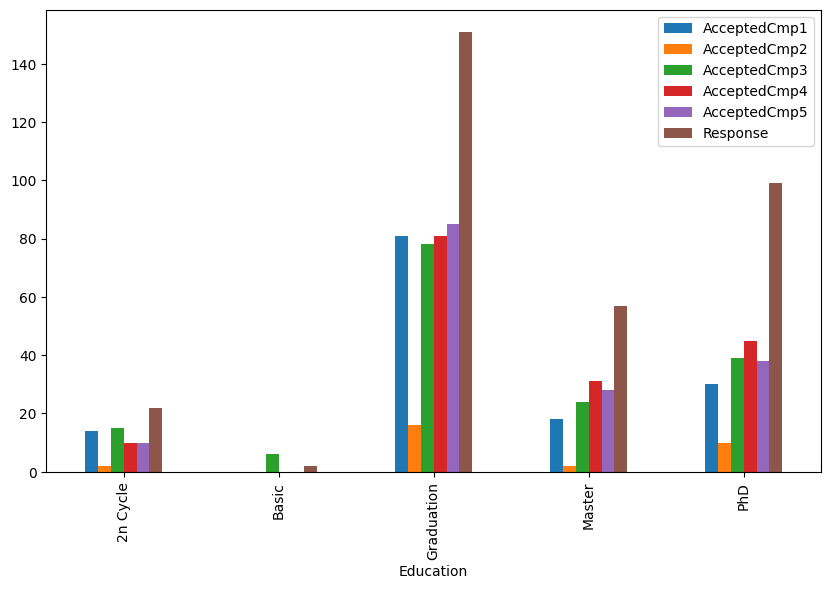

In [ ]:
df.pivot_table(["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"], ["Education"], aggfunc="sum").plot.bar()
plt.show()

In [ ]:
df['Country_code'] = df['Country'].replace({'SP': 'ESP', 'CA': 'CAN', 'US': 'USA', 'SA': 'ZAF', 'ME': 'MEX'})
df_cam = df[['Country_code', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].melt(
    id_vars='Country_code', var_name='Campaign', value_name='Accepted (%)')
df_cam = pd.DataFrame(df_cam.groupby(['Country_code', 'Campaign'])['Accepted (%)'].mean()*100).reset_index(drop=False)

df_cam['Campaign'] = df_cam['Campaign'].replace({'AcceptedCmp1': '1',
                                                'AcceptedCmp2': '2',
                                                'AcceptedCmp3': '3',
                                                'AcceptedCmp4': '4',
                                                'AcceptedCmp5': '5',
                                                 'Response': 'Most recent'
                                                })

fig = px.choropleth(df_cam, locationmode='ISO-3', color='Accepted (%)', facet_col='Campaign', facet_col_wrap=2,
                    facet_row_spacing=0.05, facet_col_spacing=0.01, width=700,
                    locations='Country_code', projection='natural earth', title='Advertising Campaign Success Rate by Country'
                   )
fig.show()

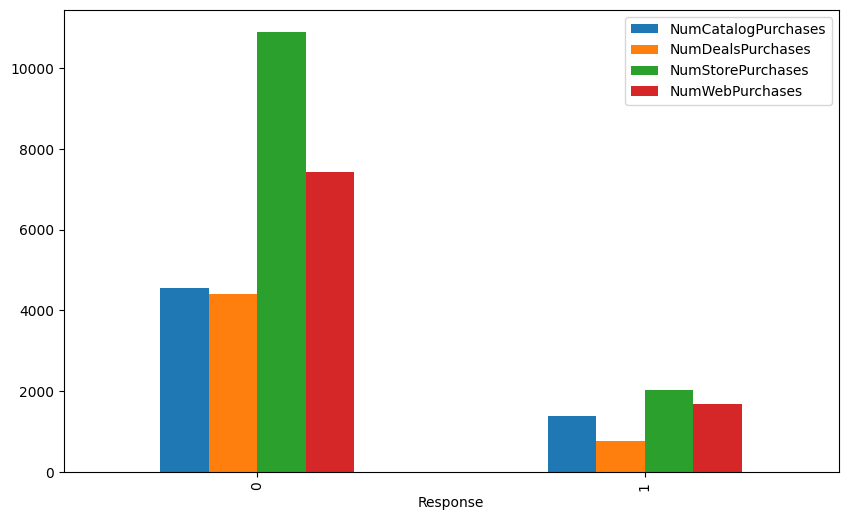

In [ ]:
df.pivot_table(["NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases"], ["Response"], aggfunc="sum").plot.bar()
plt.show()

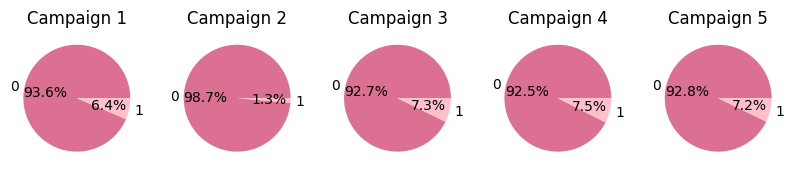

In [ ]:
fig, (ax1,ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(10,10))
# 1,5 denotes 1 row, 5 columns

colors= 'palevioletred', 'pink'

labels = df['AcceptedCmp1'].unique()
values =  df['AcceptedCmp1'].value_counts()
ax1.pie(values,labels = labels,colors = colors,autopct = '%1.1f%%')

labels = df['AcceptedCmp2'].unique()
values = df['AcceptedCmp2'].value_counts()
ax2.pie(values,labels = labels,colors = colors,autopct = '%1.1f%%')

labels = df['AcceptedCmp3'].unique()
values = df['AcceptedCmp3'].value_counts()
ax3.pie(values,labels = labels,colors = colors,autopct = '%1.1f%%')

labels = df['AcceptedCmp4'].unique()
values = df['AcceptedCmp4'].value_counts()
ax4.pie(values,labels = labels,colors = colors,autopct = '%1.1f%%')

labels = df['AcceptedCmp5'].unique()
values = df['AcceptedCmp5'].value_counts()
ax5.pie(values,labels = labels,colors = colors,autopct = '%1.1f%%')

ax1.set(aspect="equal", title='Campaign 1')
ax2.set(aspect="equal", title='Campaign 2')
ax3.set(aspect="equal", title='Campaign 3')
ax4.set(aspect="equal", title='Campaign 4')
ax5.set(aspect="equal", title='Campaign 5')
plt.show()

<ipython-input-73-cee634bad2a8>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



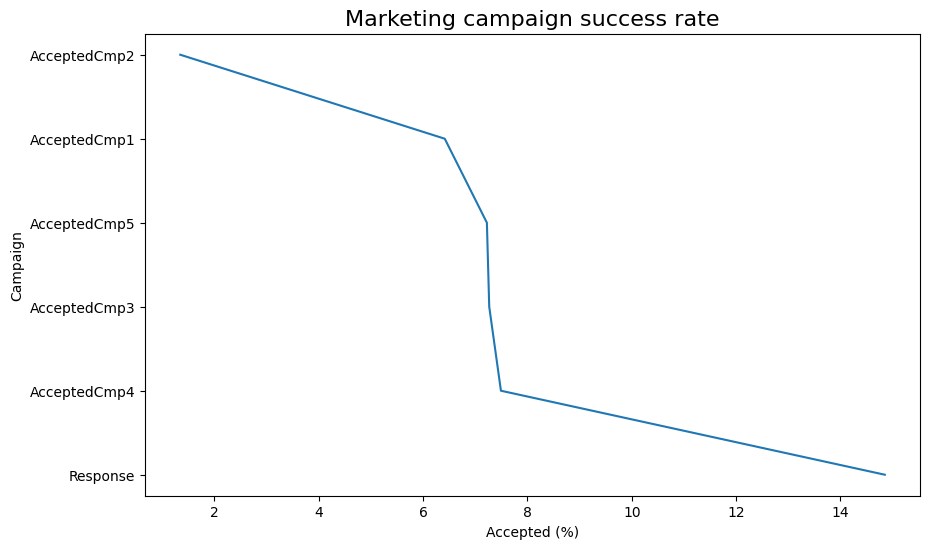

In [ ]:
cam_success = pd.DataFrame(df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()*100,
                           columns=['Percent']).reset_index()

sns.lineplot(x='Percent', y='index', data=cam_success.sort_values('Percent'), palette='Blues')
plt.xlabel('Accepted (%)')
plt.ylabel('Campaign')
plt.title('Marketing campaign success rate', size=16);

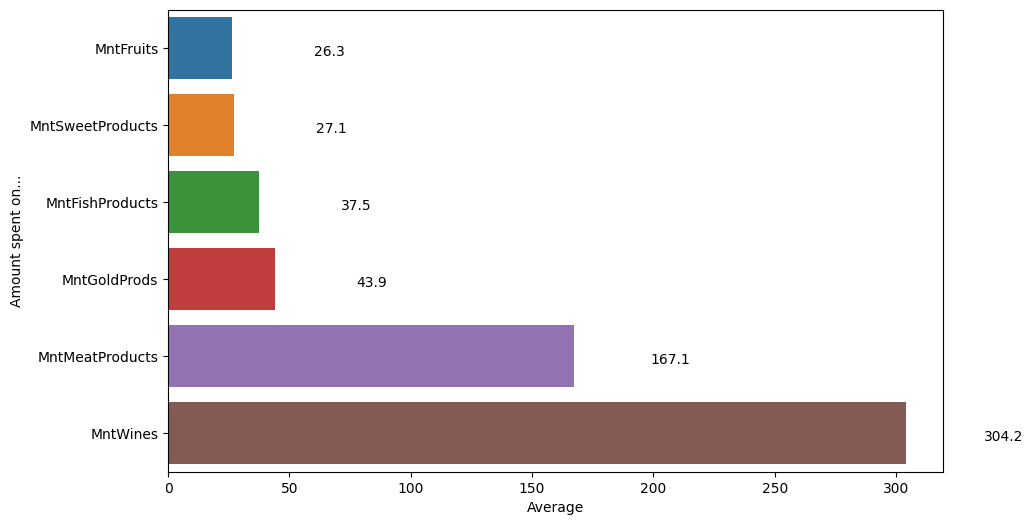

In [ ]:
spending = pd.DataFrame(round(df[mnt_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

# plot
ax = sns.barplot(x='Average', y='index', data=spending)
plt.ylabel('Amount spent on...')

## add text labels for each bar's value
for p,q in zip(ax.patches, spending['Average']):
    ax.text(x=q+40,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;

<Axes: ylabel='Frequency'>

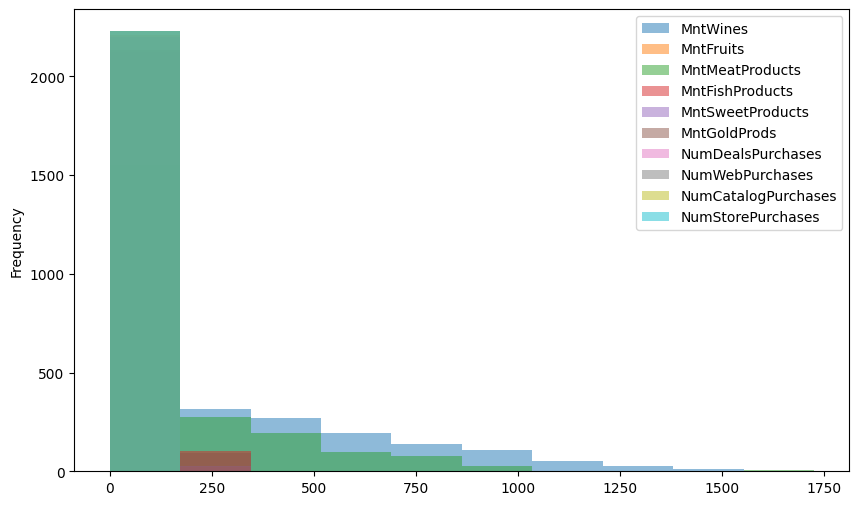

In [ ]:
countries = df[['Country', 'MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases' ]]

countries.plot.hist(alpha=0.5)

<Axes: >

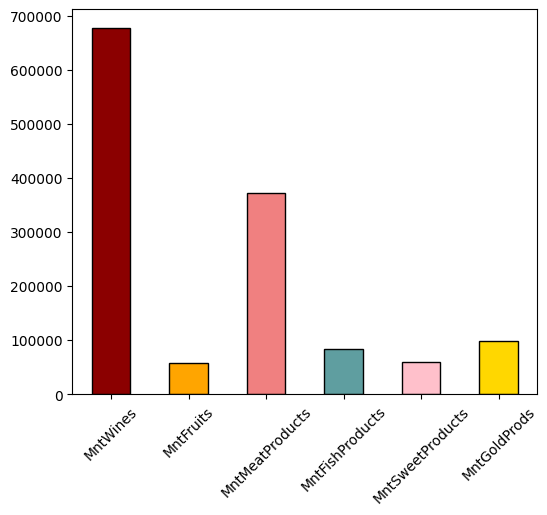

In [ ]:
colors='darkred','orange', 'lightcoral', 'cadetblue', 'pink', 'gold'
products = df[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts','MntSweetProducts' ,'MntGoldProds']]
products.sum().plot(kind='bar',figsize=(6,5),edgecolor=(0,0,0), color=colors, rot=45)

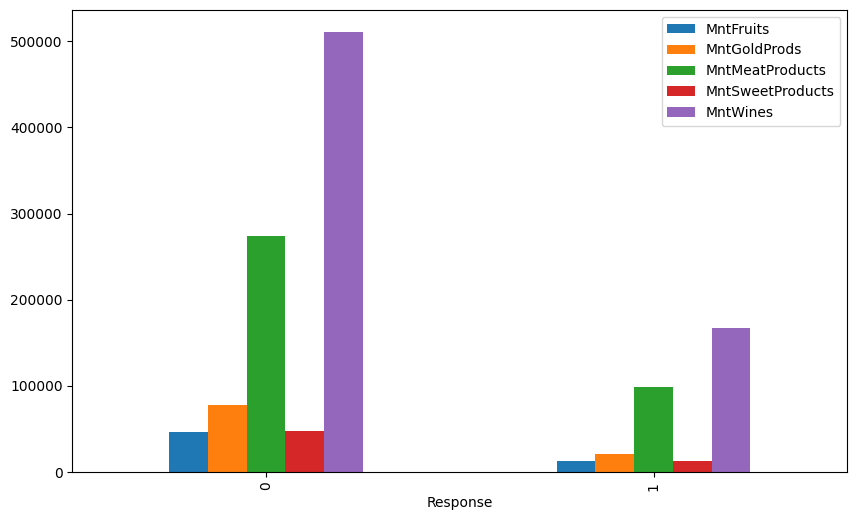

In [ ]:
df.pivot_table(["MntWines","MntFruits","MntMeatProducts","MntSweetProducts","MntGoldProds"], ["Response"], aggfunc="sum").plot.bar()
plt.show()

<Axes: >

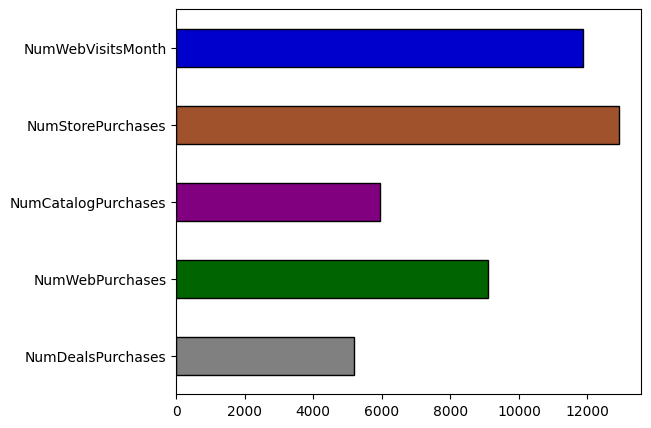

In [ ]:
#Which channels are underperforming?
channels = df[['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
colors='gray','darkgreen', 'purple', 'sienna', 'mediumblue'
channels.sum().plot(kind='barh',figsize=(6,5),edgecolor=(0,0,0), color=colors)

Wine in Spain should be focused more.
